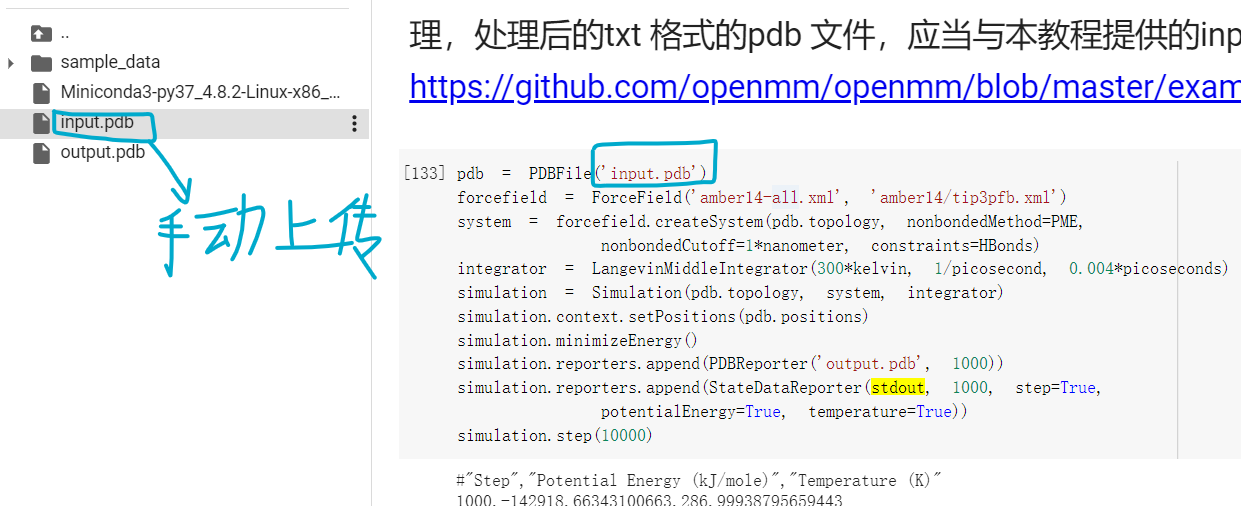

本模板是我参考泰国学者github/dataprofessor 和openmm 官方的github教程制作的。
第一段代码来自dataprofessor,为安装conda 
后面基本就是我根据Rdkt 或者openmm 官网说明自己写的了。这个模板的目的在于让初学者意识到免费开源分子动力学软件包openmm 的存在；降低分子动力学使用的难度，同时，我着重强调了输入文件input.pdb 准备工作的必要性，提供了一个基于bash 命令行的方法来如何修复，优化input.pdb的基本策略。
你可以考虑在知乎关注我 https://www.zhihu.com/people/qutesun 以获取更多药物设计领域的分子动力学模拟内容。

In [71]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-16 04:30:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   119MB/s    in 0.7s    

2021-04-16 04:30:32 (119 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::openmm==7.5.0=py37h01de88b_6
| / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 

# 注意以上代码的最后一句，指明了我们后面如果有 import 之类的语句，它所默认的导入路径是 /usr/local/lib/python3.7/site-packages/

In [72]:
!python --version

Python 3.7.6


# 以下RDKit 的安装对于一个一般的分子动力学模拟来说不是必须的，特别是如果你是在本模板之外的地方已经完成了input.pdb 的修复和准备的情况下

In [85]:
! conda install -c rdkit rdkit -y

Solving environment: / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.4.13-h06a4308_1
  conda              conda-forge::conda-4.10.1-py37h89c186~ --> pkgs/main::conda-4.10.1-py37h06a4308_1


Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


# 下面安装openmm

In [98]:
! conda install -c conda-forge openmm

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmm


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.4.13-~ --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  conda              pkgs/main::conda-4.10.1-py37h06a4308_1 --> conda-forge::conda-4.10.1-py37h89c1867_0


Proceed ([y]/n)? y

Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


# 验证安装是否成功，本例中我们没有安装GPU CUDA 的版本，所以在验证时，我们只看CPU版本是否工作正常就好了。

In [108]:
!python -m simtk.testInstallation


OpenMM Version: 7.5
Git Revision: b49b82efb5a253a7c891ca084b3370e181de2ea3

There are 3 Platforms available:

1 Reference - Successfully computed forces
2 CPU - Successfully computed forces
3 CUDA - Error computing forces with CUDA platform

CUDA platform error: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /home/conda/feedstock_root/build_artifacts/openmm_1613569773765/work/platforms/cuda/src/CudaContext.cpp:138

Median difference in forces between platforms:

Reference vs. CPU: 6.30947e-06

All differences are within tolerance.


# 下面的几行代码试图展示我们安装的openmmm 到底在哪儿，目的是让你明白，当我们使用import 的时候，我们是从哪儿导入的文件夹或者python包

In [121]:
%cd simtk/
!ls

/usr/local/lib/python3.7/site-packages/simtk
__init__.py  openmm  __pycache__  testInstallation.py  unit


In [122]:
%cd openmm/
!ls

/usr/local/lib/python3.7/site-packages/simtk/openmm
amd.py	     mtsintegrator.py			      __pycache__
app	     _openmm.cpython-37m-x86_64-linux-gnu.so  vec3.py
__init__.py  openmm.py				      version.py


In [123]:
%cd app/
!ls

/usr/local/lib/python3.7/site-packages/simtk/openmm/app
amberinpcrdfile.py     desmonddmsfile.py  pdbfile.py
amberprmtopfile.py     element.py	  pdbreporter.py
charmmcrdfiles.py      forcefield.py	  pdbxfile.py
charmmparameterset.py  gromacsgrofile.py  __pycache__
charmmpsffile.py       gromacstopfile.py  simulatedtempering.py
checkpointreporter.py  __init__.py	  simulation.py
data		       internal		  statedatareporter.py
dcdfile.py	       metadynamics.py	  topology.py
dcdreporter.py	       modeller.py


In [124]:
%cd ../../unit/
!ls

/usr/local/lib/python3.7/site-packages/simtk/unit
basedimension.py  __init__.py  quantity.py	       unit_operators.py
baseunit.py	  mymatrix.py  standard_dimensions.py  unit.py
constants.py	  prefix.py    unit_definitions.py
doctests.py	  __pycache__  unit_math.py


In [130]:
!pwd

/usr/local/lib/python3.7/site-packages


# 现在我们返回我们的工作路径/content

In [131]:
%cd /content/

/content


# 可以参考上面的内容，对import 命令的使用路径有基本的概念

In [132]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

# 现在请上传你的蛋白质文件，注意这个蛋白质一定要事先经过了预处理，一般不支持直接来自PDB Bank 的文件。关于蛋白质的处理和准备问题，请参考一个单独的小教程，不推荐使用各种各样的软件进行转存，优化等，建议使用bash命令来做一个最基本的预处理，处理后的txt 格式的pdb 文件，应当与本教程提供的input.pdb 类似。 https://github.com/openmm/openmm/blob/master/examples/input.pdb 

In [133]:
pdb = PDBFile('input.pdb')
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)
simulation.minimizeEnergy()
simulation.reporters.append(PDBReporter('output.pdb', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(10000)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,-142918.66343100663,286.99938795659443
2000,-141248.07527673885,298.78501137907125
3000,-141116.7093931827,300.86631490455875
4000,-141196.2511642919,295.2893044538628
5000,-141137.95138787656,295.92503617712873
6000,-140659.4736588374,297.82269699356215
7000,-141508.91971417738,301.1443024849822
8000,-141330.0163414962,300.5175414593338
9000,-141062.08536140516,300.29623192915847
10000,-141441.9629056909,296.5442066431284


# 以上动力学模拟代码行的详细释义，请参考 http://docs.openmm.org/latest/userguide/application.html#a-first-example 

# 模拟完成后，请及时下载output.pdb 进行保存，一旦网页关闭，结果将被清空

这里我只简单说一下，对于空载蛋白质的处理，当你拿到一个PDBbank 的结构，请用sublime等txt 编辑器打开，表头会很复杂，而很多信息不是我们必须的，同时也为了去除其他一些非必要的结构如金属离子等，我们可以是用bash 命令来重新做一个pdb 文件，input.pdb. 最好保证你的input.pdb 的表头和表尾跟下图是类似的。
表头 为 MODEL      0
表尾 为 ENDMDL
中间全是 ATOM
请搜索如何使用 grep 命令，从原始pdb 文件中抓取所有ATOM 到input.pdb
即类似

```
grep ATOM original.pdb > input.pdb
```
然后你可考虑手动加上表头表尾



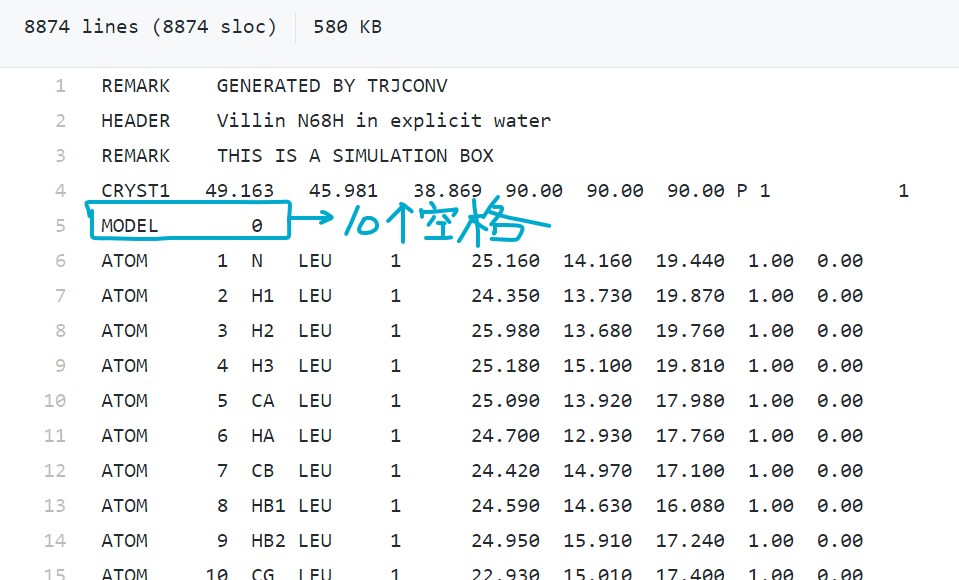

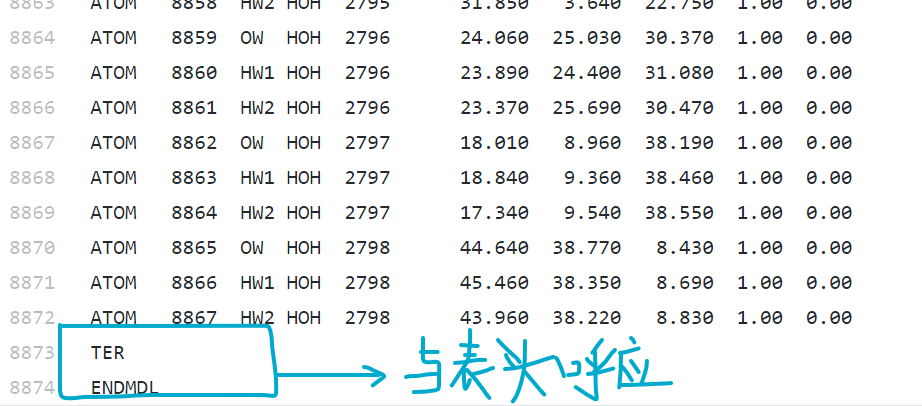

# 最后加载output.pdb 到pymol 或者vmd 中即可进行视觉查验

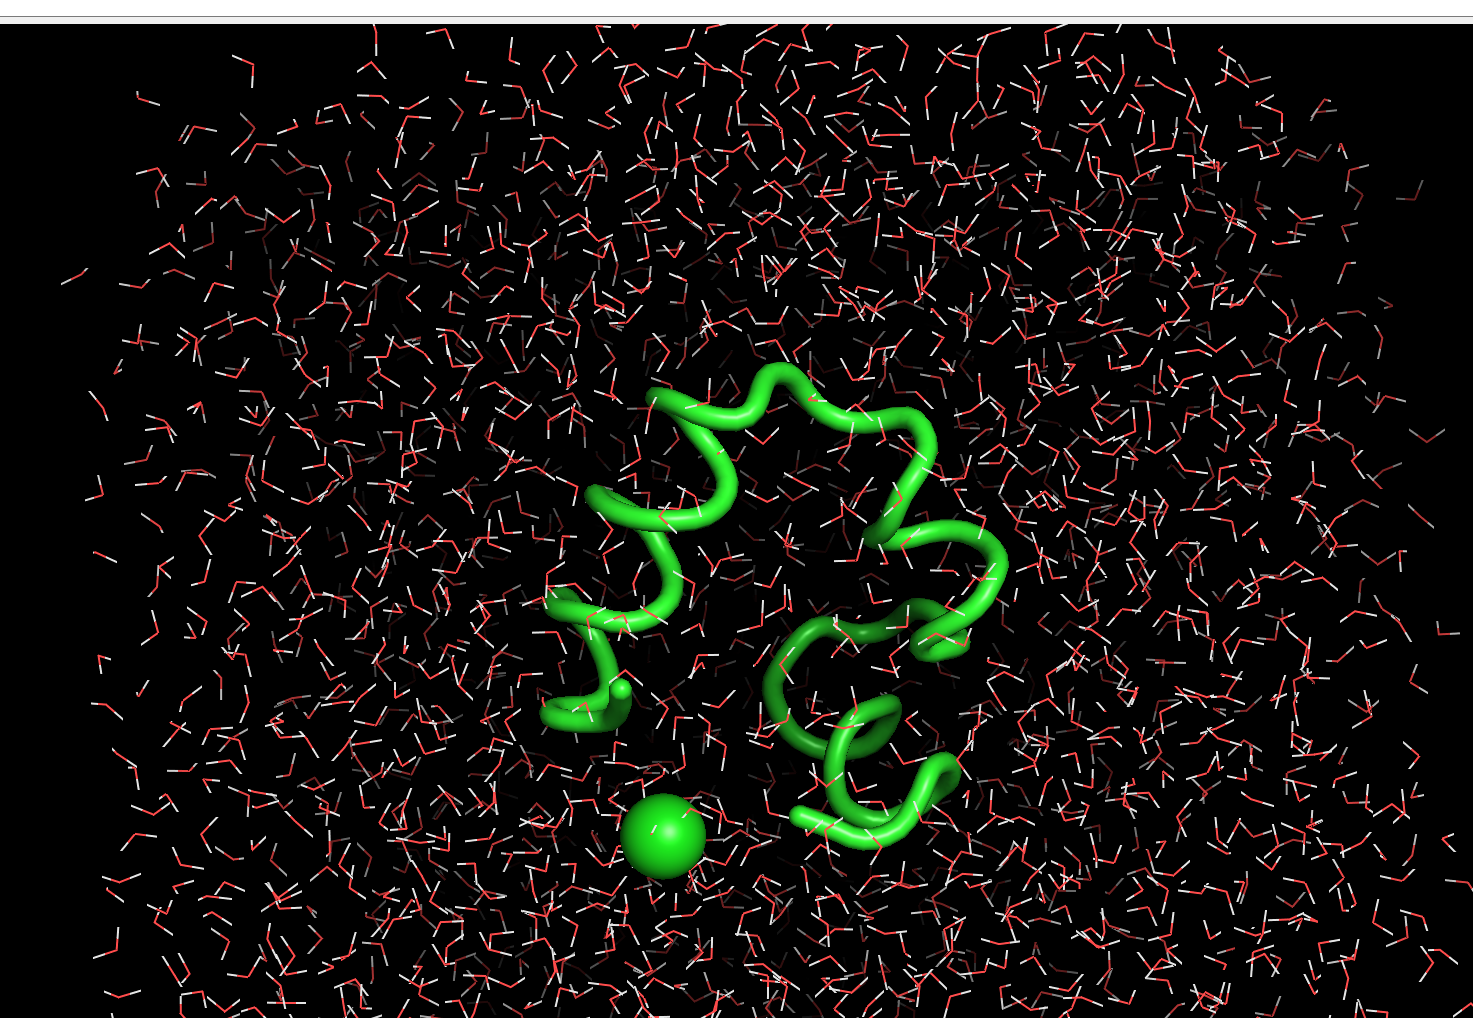